In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
df=pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")

In [4]:
lst=["id","keyword","location" ]
for i in lst:
  df.drop([i],inplace=True,axis=1)

In [5]:
df.isna().sum()

text      0
target    0
dtype: int64

In [6]:
df["target"].unique()

array([1, 0])

In [7]:
msg=df.text
msg

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [8]:
msg=msg.str.replace('[^a-zA-Z0-9]+'," ")
msg

/tmp/ipykernel_32/2807355811.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  msg=msg.str.replace('[^a-zA-Z0-9]+'," ")


0       Our Deeds are the Reason of this earthquake Ma...
1                   Forest fire near La Ronge Sask Canada
2       All residents asked to shelter in place are be...
3       13 000 people receive wildfires evacuation ord...
4       Just got sent this photo from Ruby Alaska as s...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609     aria ahrary TheTawniest The out of control wi...
7610    M1 94 01 04 UTC 5km S of Volcano Hawaii http t...
7611    Police investigating after an e bike collided ...
7612    The Latest More Homes Razed by Northern Califo...
Name: text, Length: 7613, dtype: object

In [9]:
# Assuming 'text_column' is the column in your DataFrame that contains the text data
text_corpus = ' '.join(df['text'].values)

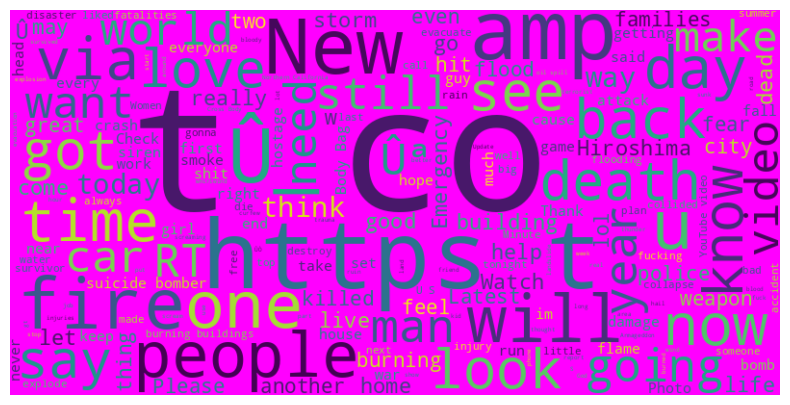

In [10]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='magenta').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
import nltk
from nltk.stem import PorterStemmer
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
from pandas.core import apply
stemmer=PorterStemmer()
msg=msg.apply(lambda line:[stemmer.stem(token.lower()) for token in word_tokenize(line)]).apply(lambda token:" ".join(token))

In [13]:
msg=msg.apply(lambda line:[token for token in word_tokenize(line) if len(token)>2]).apply(lambda y:" ".join(y))

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
data_vec=tf.fit_transform(msg)
print(data_vec)

  (0, 1608)	0.21942547880618488
  (0, 6257)	0.42717757850256766
  (0, 1609)	0.38140535560915284
  (0, 10121)	0.2727681981318448
  (0, 5265)	0.30304699735963175
  (0, 15587)	0.18950273112611013
  (0, 13104)	0.3233015286543763
  (0, 15503)	0.10712944468165368
  (0, 1893)	0.1995627441917412
  (0, 4571)	0.4415483971572202
  (0, 11738)	0.26638243281694385
  (1, 3259)	0.4150645718095929
  (1, 13854)	0.5257253531598639
  (1, 13554)	0.5257253531598639
  (1, 10971)	0.3352216940231661
  (1, 6088)	0.23484379430770647
  (1, 6251)	0.3277528267609462
  (2, 5763)	0.21637499513682926
  (2, 11682)	0.20924361627923255
  (2, 5692)	0.1713729065953107
  (2, 11724)	0.19777356459353584
  (2, 11480)	0.20617344923400344
  (2, 11244)	0.31199188218232443
  (2, 12245)	0.43079341468096505
  (2, 14185)	0.549830586078413
  :	:
  (7611, 2596)	0.5630388415260076
  (7611, 11188)	0.2467154809127876
  (7611, 15634)	0.24015247895750122
  (7611, 8209)	0.19696407443722463
  (7611, 1454)	0.14821765042242882
  (7611, 14083)	0

In [16]:
y=df['target'].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.3,random_state=1)

In [18]:
from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
sv=SVC()
# nb=GaussianNB()
rf=RandomForestClassifier()
ab= AdaBoostClassifier()
models=[sv,rf,ab]
for model in models:
  print(model)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))

SVC()
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1326
           1       0.89      0.61      0.73       958

    accuracy                           0.81      2284
   macro avg       0.83      0.78      0.79      2284
weighted avg       0.82      0.81      0.80      2284

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.76      0.95      0.84      1326
           1       0.89      0.59      0.71       958

    accuracy                           0.79      2284
   macro avg       0.82      0.77      0.77      2284
weighted avg       0.81      0.79      0.78      2284

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      1326
           1       0.78      0.55      0.65       958

    accuracy                           0.75      2284
   macro avg       0.76      0.72      0.73      2284
weighted avg       0.7